In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
from jupyterthemes import jtplot

# jt -t onedork -tf latosans -tfs 15 -lineh 170 -ofs 14
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
set_nb_theme('onedork')
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=True)
import matplotlib.pyplot as plt
import numpy as np
from random import random
%matplotlib inline

In [2]:
class HistogramFilter2D:

  def __init__(self, world_map, correct_sensor_prob, correct_move_prob):
    
    self.world_map = np.array(world_map)
    self.r, self.c = self.world_map.shape
    self.current = self.confuse()
    
    self.sensor_prob = correct_sensor_prob
    self.move_prob = correct_move_prob
    
    self.move_map = {
      'stay': (0, 0), 
      'right': (0, 1), 
      'left': (0, -1), 
      'down': (1, 0),
      'up': (-1, 0)
    }
    
  def confuse(self):
    
    self.current = np.ones([self.r, self.c]) / (self.r * self.c)
    return self.current

  def sense(self, val):
    
    temp = np.zeros_like(self.current)
    correct_sensor = self.sensor_prob 
    wrong_sensor = 1 - self.sensor_prob
    
    for r in range(self.r):
      for c in range(self.c):
        if val == self.world_map[r, c]:
          temp[r, c] = self.current[r, c] * correct_sensor
        else:
          temp[r, c] = self.current[r, c] * wrong_sensor
        
    self.current = temp / np.sum(temp)
    return self.current

  def move(self, ver_step = 0, hor_step = 0, go = None): # cyclical world
    
    if go:
      ver_step, hor_step = self.move_map[go]
    
    prob_moved = self.move_prob
    prob_stayed = 1 - prob_moved
    
    temp = np.zeros_like(self.current)
    
    for r in range(self.r):
      for c in range(self.c):
        
        val = self.current[r, c]
        
        new_r = (r + ver_step) % self.r
        new_c = (c + hor_step) % self.c
        
        temp[new_r, new_c] += prob_moved * val 
        temp[r, c] += prob_stayed * val
    
    self.current = temp
    return self.current

In [3]:
def formatted_print(s, ar):
  
  print(str(s), ":")
    
  for r in range(ar.shape[0]):
    print('{:3}'.format(' '), end = "")
    for c in range(ar.shape[1]):
      print(" {:.3f} ".format(ar[r, c]), " ", end = "")
    print()

  print()

In [4]:
def plot_probability(ar):
  # ar - robot's current state
  plt.figure(figsize=(10,10))
  fig, ax = plt.subplots()
    
  for row in range(ar.shape[0]):
    for col in range(ar.shape[1]):
      r = ar[row, col] / 2.0 
      y = ar.shape[0] - row
      ax.add_patch(plt.Circle((col, y), radius = r, color='#947CB0', alpha= 1.0))
        
  ax.set_aspect('equal')
  ax.plot()   #Causes an autoscale update.
  plt.ylim((0, ar.shape[0] + 1))
  plt.xlim((-1, ar.shape[1]))
  plt.show()

In [5]:
def visualize(label, ar):
  print("------------------------------")
  formatted_print(label, ar)
  plot_probability(ar)

------------------------------
initial state :
    0.111    0.111    0.111   
    0.111    0.111    0.111   
    0.111    0.111    0.111   



<Figure size 720x720 with 0 Axes>

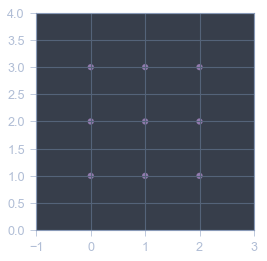

------------------------------
sensed r :
    0.000    0.000    0.000   
    0.000    1.000    0.000   
    0.000    0.000    0.000   



<Figure size 720x720 with 0 Axes>

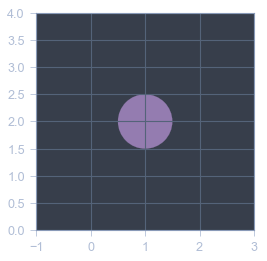

In [6]:
world = [
  ['g', 'g', 'g'],
  ['g', 'r', 'g'],
  ['g', 'g', 'g']
]

robot = HistogramFilter2D(
          world_map = world,
          correct_sensor_prob = 1, 
          correct_move_prob = 1)

robot.confuse()
visualize("initial state", robot.current)
visualize("sensed r", robot.sense('r'))


suppose, our sensor is perfect and our motion is exact.
------------------------------
initial state :
    0.111    0.111    0.111   
    0.111    0.111    0.111   
    0.111    0.111    0.111   



<Figure size 720x720 with 0 Axes>

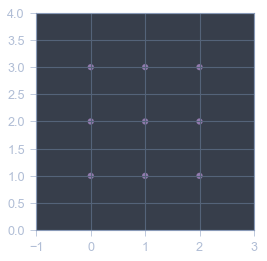

------------------------------
sensed 'r' :
    0.000    0.000    0.000   
    0.000    0.500    0.500   
    0.000    0.000    0.000   



<Figure size 720x720 with 0 Axes>

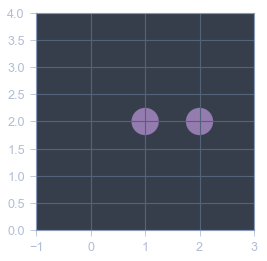

------------------------------
moved left :
    0.000    0.000    0.000   
    0.500    0.500    0.000   
    0.000    0.000    0.000   



<Figure size 720x720 with 0 Axes>

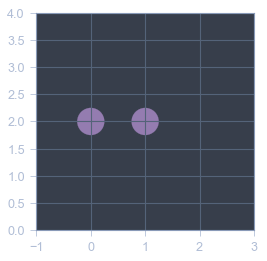

------------------------------
moved down :
    0.000    0.000    0.000   
    0.000    0.000    0.000   
    0.500    0.500    0.000   



<Figure size 720x720 with 0 Axes>

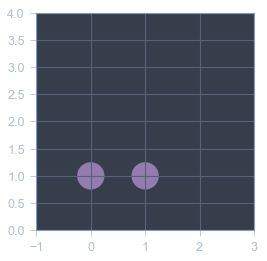

------------------------------
moved up :
    0.000    0.000    0.000   
    0.500    0.500    0.000   
    0.000    0.000    0.000   



<Figure size 720x720 with 0 Axes>

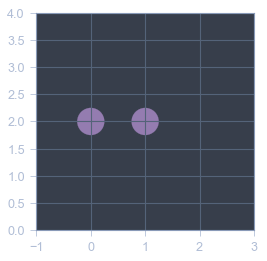

------------------------------
stayed :
    0.000    0.000    0.000   
    0.500    0.500    0.000   
    0.000    0.000    0.000   



<Figure size 720x720 with 0 Axes>

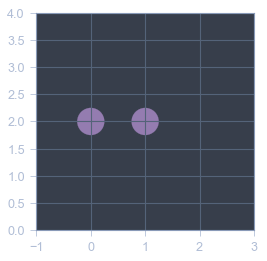

In [7]:
world = [
  ['g', 'g', 'g'],
  ['g', 'r', 'r'],
  ['g', 'g', 'g']
]

robot = HistogramFilter2D(
          world_map = world,
          correct_sensor_prob = 1, 
          correct_move_prob = 1)

print("suppose, our sensor is perfect and our motion is exact.")
robot.confuse()
visualize("initial state", robot.current)
visualize("sensed 'r'", robot.sense('r'))
visualize("moved left", robot.move(go = 'left'))
visualize("moved down", robot.move(go = 'down'))
visualize("moved up", robot.move(go = 'up'))
visualize("stayed", robot.move(go = 'stay'))

------------------------------
initial state :
    0.111    0.111    0.111   
    0.111    0.111    0.111   
    0.111    0.111    0.111   



<Figure size 720x720 with 0 Axes>

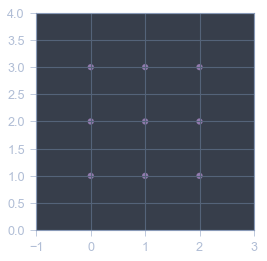

------------------------------
sensed 'r' :
    0.067    0.067    0.067   
    0.067    0.267    0.267   
    0.067    0.067    0.067   



<Figure size 720x720 with 0 Axes>

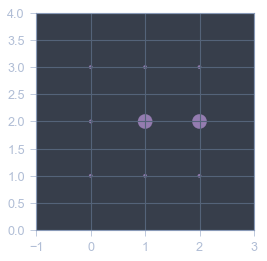

------------------------------
moved right :
    0.067    0.067    0.067   
    0.267    0.067    0.267   
    0.067    0.067    0.067   



<Figure size 720x720 with 0 Axes>

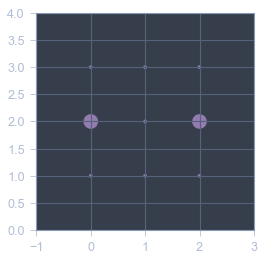

------------------------------
sensed 'r' :
    0.033    0.033    0.033   
    0.133    0.133    0.533   
    0.033    0.033    0.033   



<Figure size 720x720 with 0 Axes>

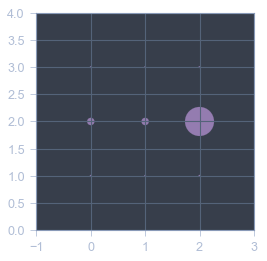

In [8]:
world = [
  ['g', 'g', 'g'],
  ['g', 'r', 'r'],
  ['g', 'g', 'g']
]

robot = HistogramFilter2D(
          world_map = world,
          correct_sensor_prob = 0.8, 
          correct_move_prob = 1)

visualize("initial state", robot.current)
visualize("sensed 'r'", robot.sense('r'))
visualize("moved right", robot.move(go = 'right'))
visualize("sensed 'r'", robot.sense('r'))

------------------------------
initial state :
    0.111    0.111    0.111   
    0.111    0.111    0.111   
    0.111    0.111    0.111   



<Figure size 720x720 with 0 Axes>

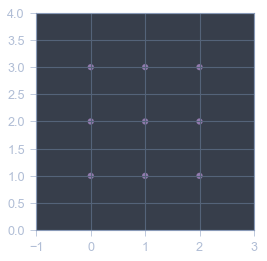

------------------------------
sensed 'r' :
    0.000    0.000    0.000   
    0.000    0.500    0.500   
    0.000    0.000    0.000   



<Figure size 720x720 with 0 Axes>

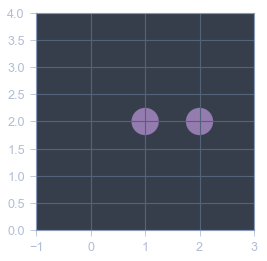

------------------------------
moved right :
    0.000    0.000    0.000   
    0.500    0.000    0.500   
    0.000    0.000    0.000   



<Figure size 720x720 with 0 Axes>

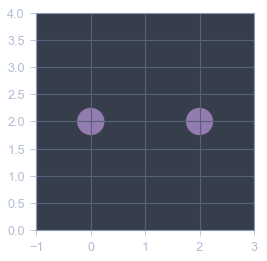

------------------------------
sensed 'r' :
    0.000    0.000    0.000   
    0.000    0.000    1.000   
    0.000    0.000    0.000   



<Figure size 720x720 with 0 Axes>

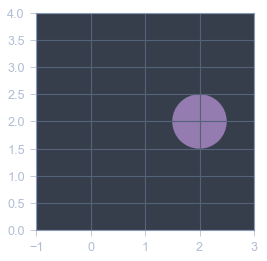

In [9]:
world = [
  ['g', 'g', 'g'],
  ['g', 'r', 'r'],
  ['g', 'g', 'g']
]

robot = HistogramFilter2D(
          world_map = world,
          correct_sensor_prob = 1, 
          correct_move_prob = 1)

visualize("initial state", ar = robot.current)
visualize("sensed 'r'", ar = robot.sense('r'))
visualize("moved right", ar = robot.move(go = 'right'))
visualize("sensed 'r'", ar = robot.sense('r'))

------------------------------
initial state :
    0.111    0.111    0.111   
    0.111    0.111    0.111   
    0.111    0.111    0.111   



<Figure size 720x720 with 0 Axes>

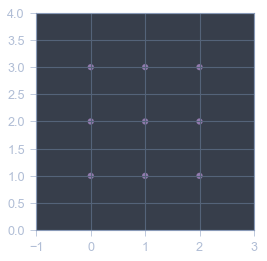

------------------------------
sensed 'r' :
    0.067    0.067    0.067   
    0.067    0.267    0.267   
    0.067    0.067    0.067   



<Figure size 720x720 with 0 Axes>

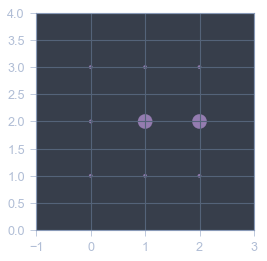

------------------------------
moved right :
    0.067    0.067    0.067   
    0.167    0.167    0.267   
    0.067    0.067    0.067   



<Figure size 720x720 with 0 Axes>

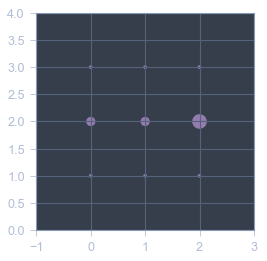

------------------------------
sensed 'r' :
    0.029    0.029    0.029   
    0.072    0.290    0.464   
    0.029    0.029    0.029   



<Figure size 720x720 with 0 Axes>

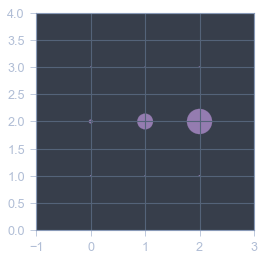

In [10]:
world = [
  ['g', 'g', 'g'],
  ['g', 'r', 'r'],
  ['g', 'g', 'g']
]

robot = HistogramFilter2D(
          world_map = world,
          correct_sensor_prob = 0.8, 
          correct_move_prob = 0.5)

visualize("initial state", ar = robot.current)
visualize("sensed 'r'", ar = robot.sense('r'))
visualize("moved right", ar = robot.move(go = 'right'))
visualize("sensed 'r'", ar = robot.sense('r'))

------------------------------
initial state :
    0.111    0.111    0.111   
    0.111    0.111    0.111   
    0.111    0.111    0.111   



<Figure size 720x720 with 0 Axes>

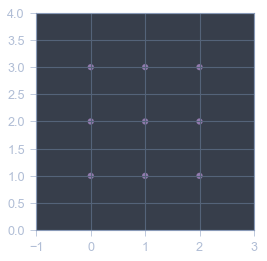

------------------------------
sensed 'r' :
    0.000    0.000    0.000   
    0.000    0.500    0.500   
    0.000    0.000    0.000   



<Figure size 720x720 with 0 Axes>

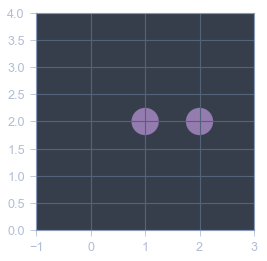

------------------------------
moved right :
    0.000    0.000    0.000   
    0.250    0.250    0.500   
    0.000    0.000    0.000   



<Figure size 720x720 with 0 Axes>

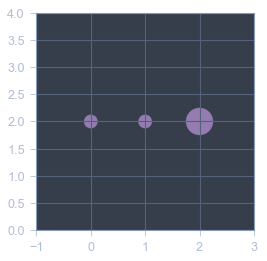

------------------------------
sensed 'r' :
    0.000    0.000    0.000   
    0.000    0.333    0.667   
    0.000    0.000    0.000   



<Figure size 720x720 with 0 Axes>

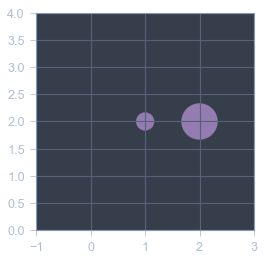

In [11]:
world = [
  ['g', 'g', 'g'],
  ['g', 'r', 'r'],
  ['g', 'g', 'g']
]

robot = HistogramFilter2D(
          world_map = world,
          correct_sensor_prob = 1, 
          correct_move_prob = 0.5)

visualize("initial state", ar = robot.current)
visualize("sensed 'r'", ar = robot.sense('r'))
visualize("moved right", ar = robot.move(go = 'right'))
visualize("sensed 'r'", ar = robot.sense('r'))

------------------------------
initial state :
    0.111    0.111    0.111   
    0.111    0.111    0.111   
    0.111    0.111    0.111   



<Figure size 720x720 with 0 Axes>

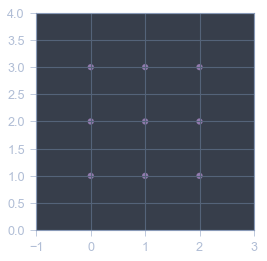

------------------------------
sensed 'r' :
    0.086    0.086    0.086   
    0.086    0.200    0.200   
    0.086    0.086    0.086   



<Figure size 720x720 with 0 Axes>

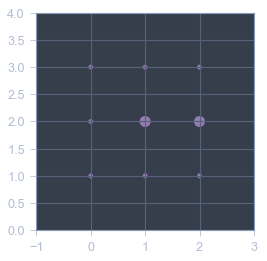

------------------------------
moved right :
    0.086    0.086    0.086   
    0.143    0.143    0.200   
    0.086    0.086    0.086   



<Figure size 720x720 with 0 Axes>

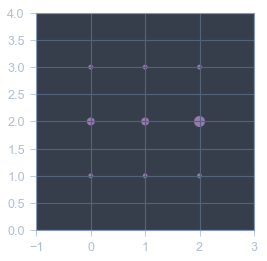

------------------------------
sensed 'r' :
    0.059    0.059    0.059   
    0.098    0.229    0.320   
    0.059    0.059    0.059   



<Figure size 720x720 with 0 Axes>

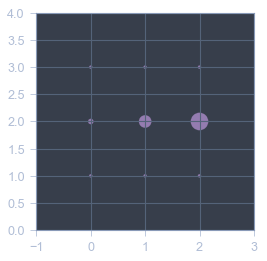

In [12]:
world = [
  ['g', 'g', 'g'],
  ['g', 'r', 'r'],
  ['g', 'g', 'g']
]

robot = HistogramFilter2D(
          world_map = world,
          correct_sensor_prob = 0.7, 
          correct_move_prob = 0.5)

visualize("initial state", ar = robot.current)
visualize("sensed 'r'", ar = robot.sense('r'))
visualize("moved right", ar = robot.move(go = 'right'))
visualize("sensed 'r'", ar = robot.sense('r'))

------------------------------
initial state :
    0.050    0.050    0.050    0.050    0.050   
    0.050    0.050    0.050    0.050    0.050   
    0.050    0.050    0.050    0.050    0.050   
    0.050    0.050    0.050    0.050    0.050   



<Figure size 720x720 with 0 Axes>

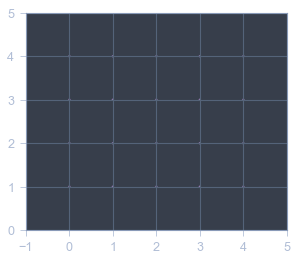

------------------------------
sensed 'g' :
    0.037    0.087    0.087    0.037    0.037   
    0.037    0.037    0.087    0.037    0.037   
    0.037    0.037    0.087    0.087    0.037   
    0.037    0.037    0.037    0.037    0.037   



<Figure size 720x720 with 0 Axes>

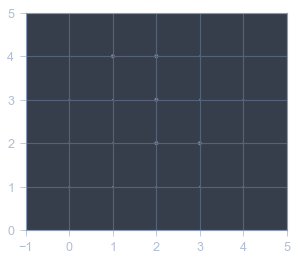

------------------------------
moved right :
    0.037    0.047    0.087    0.077    0.037   
    0.037    0.037    0.047    0.077    0.037   
    0.037    0.037    0.047    0.087    0.077   
    0.037    0.037    0.037    0.037    0.037   



<Figure size 720x720 with 0 Axes>

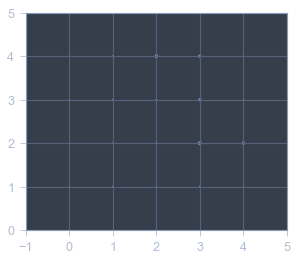

------------------------------
sensed 'g' :
    0.026    0.078    0.143    0.054    0.026   
    0.026    0.026    0.078    0.054    0.026   
    0.026    0.026    0.078    0.143    0.054   
    0.026    0.026    0.026    0.026    0.026   



<Figure size 720x720 with 0 Axes>

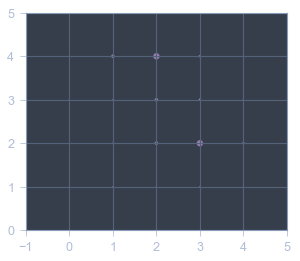

------------------------------
moved down :
    0.026    0.037    0.050    0.032    0.026   
    0.026    0.068    0.130    0.054    0.026   
    0.026    0.026    0.078    0.072    0.032   
    0.026    0.026    0.068    0.120    0.049   



<Figure size 720x720 with 0 Axes>

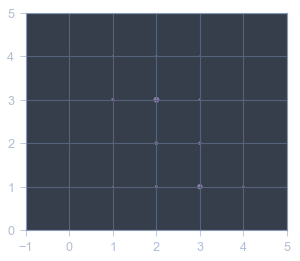

------------------------------
sensed 'g' :
    0.018    0.057    0.078    0.021    0.018   
    0.018    0.045    0.204    0.037    0.018   
    0.018    0.018    0.122    0.113    0.021   
    0.018    0.018    0.045    0.081    0.033   



<Figure size 720x720 with 0 Axes>

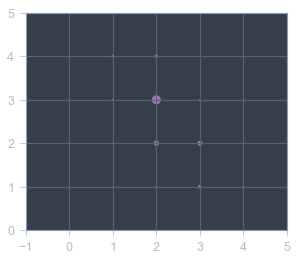

------------------------------
moved down :
    0.018    0.026    0.052    0.069    0.030   
    0.018    0.055    0.103    0.024    0.018   
    0.018    0.040    0.188    0.052    0.018   
    0.018    0.018    0.107    0.107    0.024   



<Figure size 720x720 with 0 Axes>

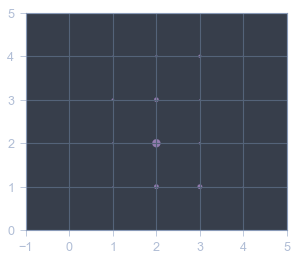

------------------------------
sensed 'g' :
    0.011    0.038    0.078    0.044    0.019   
    0.011    0.035    0.154    0.016    0.011   
    0.011    0.026    0.281    0.078    0.012   
    0.011    0.011    0.068    0.068    0.015   



<Figure size 720x720 with 0 Axes>

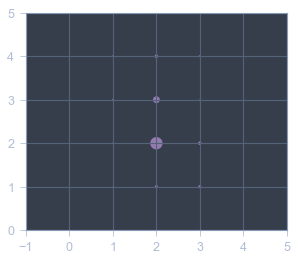

------------------------------
moved right :
    0.018    0.017    0.046    0.071    0.039   
    0.011    0.016    0.059    0.127    0.015   
    0.012    0.014    0.077    0.240    0.064   
    0.014    0.011    0.023    0.068    0.058   



<Figure size 720x720 with 0 Axes>

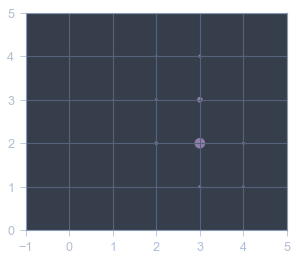

------------------------------
sensed 'g' :
    0.011    0.025    0.068    0.045    0.025   
    0.007    0.010    0.087    0.080    0.009   
    0.007    0.009    0.113    0.354    0.041   
    0.009    0.007    0.014    0.043    0.036   



<Figure size 720x720 with 0 Axes>

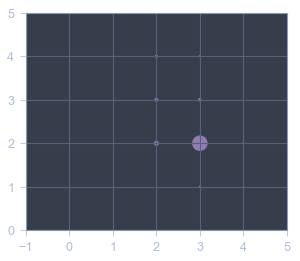

In [13]:
world = [
  ['r', 'g', 'g', 'r', 'r'],
  ['r', 'r', 'g', 'r', 'r'],
  ['r', 'r', 'g', 'g', 'r'],
  ['r', 'r', 'r', 'r', 'r']
]

robot = HistogramFilter2D(
          world_map = world,
          correct_sensor_prob = 0.7, 
          correct_move_prob = 0.8)

visualize( "initial state", ar = robot.current)
visualize("sensed 'g'", ar = robot.sense('g'))
visualize("moved right", ar = robot.move(go = 'right'))
visualize("sensed 'g'", ar = robot.sense('g'))

visualize("moved down", ar = robot.move(go = 'down'))
visualize("sensed 'g'", ar = robot.sense('g'))

visualize("moved down", ar = robot.move(go = 'down'))
visualize("sensed 'g'", ar = robot.sense('g'))

visualize("moved right", ar = robot.move(go = 'right'))
visualize("sensed 'g'", ar = robot.sense('g'))

